# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


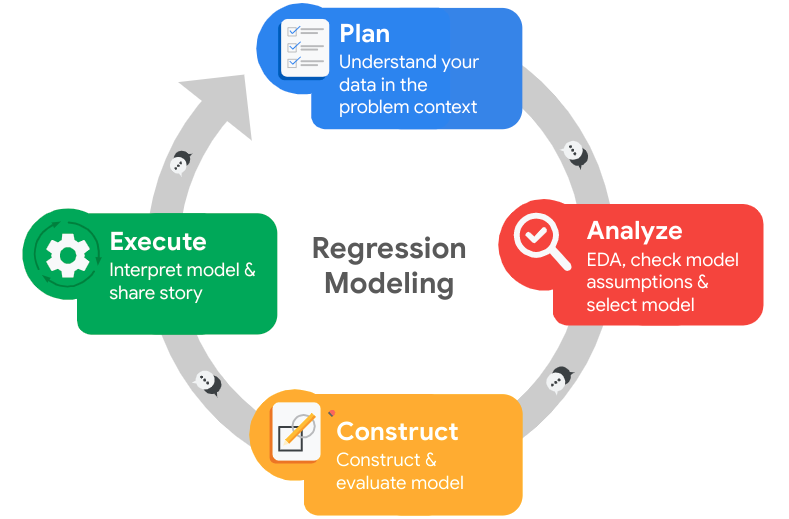

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The higher ups in the company and decision makers on employee policy
2. Based on factors(survey) wether en employee stays (1) or leaves the company (0)
3. Average work hour ~ 160 but seems to be far exceeding, salary is categorical variable
4. Pandas and scikit and plotting packages
5. Dont have to look at gender
6. number of hours worked, satisfaction level, performance score, promotion



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt





### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0 = df0.rename(columns = {'time_spend_company':'years_in_company'})
# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_in_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   years_in_company       14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_in_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
201/22, 310/22 # average and maximum number of hours worked ... a lot for the maximum number

(9.136363636363637, 14.090909090909092)

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_in_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###

df0 = df0.rename(columns = {'Work_accident':'work_accident',  'Department': 'department','promotion_last_5years':'promotion_last_5_years' })

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_in_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum() # there is no missing value ... the data seems really clean

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
years_in_company          0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep='last')]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,years_in_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12658,0.38,0.53,2,146,3,0,1,0,support,low
12659,0.77,0.91,5,221,6,0,1,0,support,medium
12660,0.44,0.50,2,130,3,0,1,0,support,medium
12661,0.39,0.46,2,136,3,0,1,0,support,medium


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: years_in_company, dtype: float64


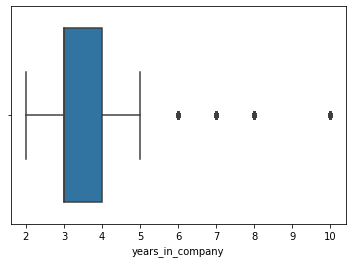

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

print(df1.describe()['years_in_company'])
sns.boxplot(df1['years_in_company'])


In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df1[df1['years_in_company'] >= 5.5].shape[0] / df1.shape[0] * 100

6.8718205320657155

In [14]:
iqr = df1['years_in_company'].quantile(0.75) - df1['years_in_company'].quantile(0.25)
print(f'iqr = {iqr}')
ul = df1['years_in_company'].quantile(0.75) + 1.5*iqr
ll = df1['years_in_company'].quantile(0.25) - 1.5*iqr

print(f'lower limit = {ll}, upper limit = {ul}')

number_outliers = df1[df1['years_in_company'] >= ul].shape[0]

percent_outliers = round(number_outliers / df1.shape[0] * 100, 3)

print(f'number of outliers = {number_outliers}, percentage of outliers = {percent_outliers} %')




iqr = 1.0
lower limit = 1.5, upper limit = 5.5
number of outliers = 824, percentage of outliers = 6.872 %


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()


# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts(normalize = True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

In [16]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_in_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

71.77883412559419 28.221165874405806


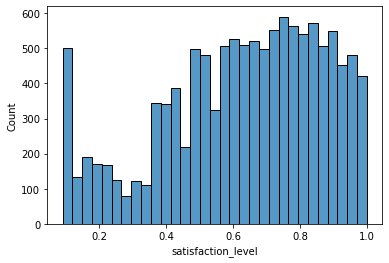

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df1['satisfaction_level'])
sat_level_avg = df1['satisfaction_level'].mean()


sat = df1[df1['satisfaction_level'] > 0.5].shape[0] / df1.shape[0] * 100
unsat = df1[df1['satisfaction_level'] <= 0.5].shape[0] / df1.shape[0] * 100

print(sat, unsat)

Text(0, 0.5, 'Counts')

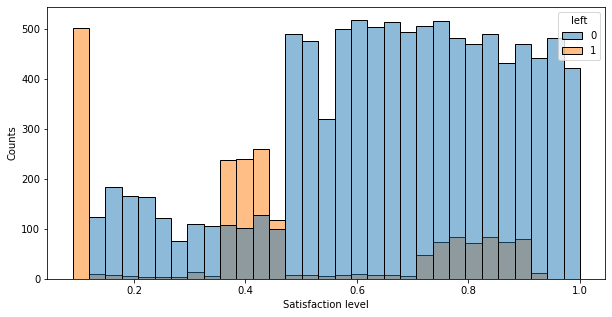

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize = (10,5))
sns.histplot(data = df1, x = 'satisfaction_level', hue = 'left')
plt.xlabel('Satisfaction level')
plt.ylabel('Counts')

## leave satisfaction is around 0 or 0.4 but surprisingly also around 0.8
## most stay even if they say satisfaction level is around 0.2

Text(0, 0.5, 'Counts')

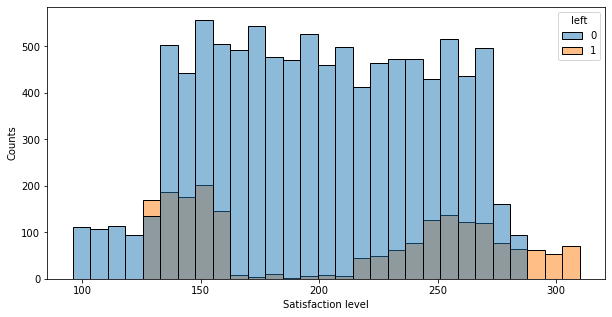

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.histplot(data = df1, x ='average_montly_hours', hue = 'left')
plt.xlabel('Satisfaction level')
plt.ylabel('Counts')


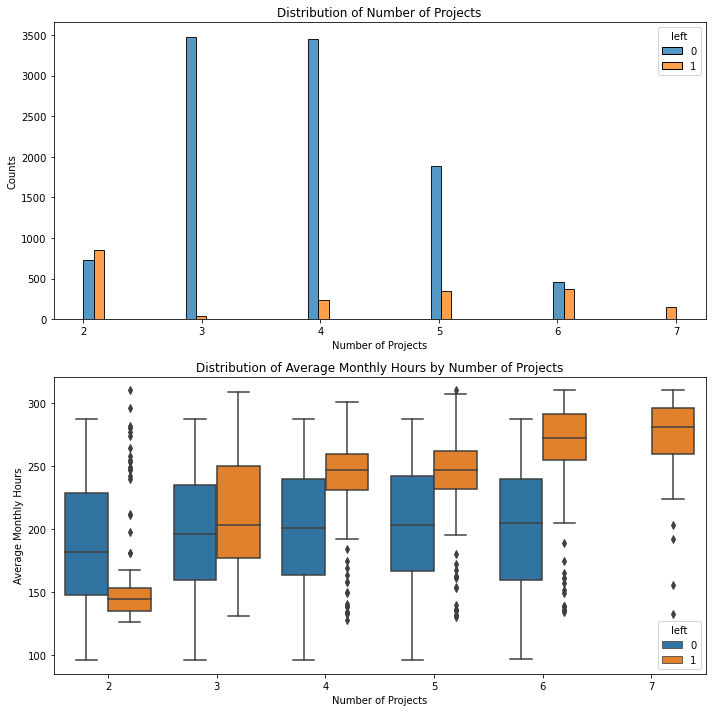

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=axes[0])
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Counts')
axes[0].set_title('Distribution of Number of Projects')

# Plot the second subplot (boxplot)
sns.boxplot(data=df1, x='number_project', y='average_montly_hours', hue='left', ax=axes[1])
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Average Monthly Hours')
axes[1].set_title('Distribution of Average Monthly Hours by Number of Projects')


# Show plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Text(0, 0.5, 'Counts')

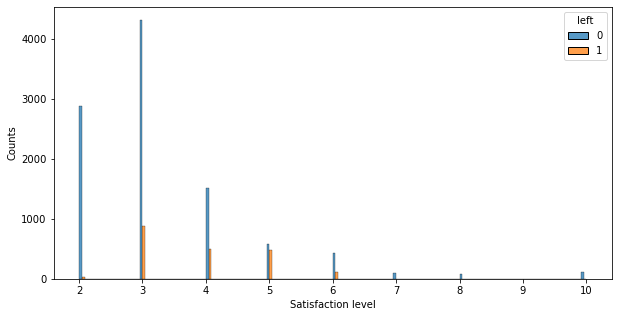

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize = (10,5))
sns.histplot(data = df1, x ='years_in_company', hue = 'left',  multiple='dodge')
plt.xlabel('Satisfaction level')
plt.ylabel('Counts')


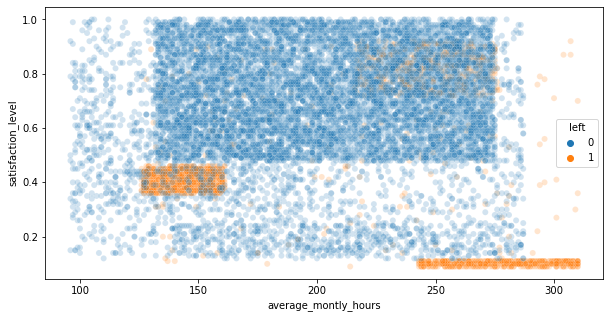

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.scatterplot(data = df1, x = 'average_montly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.2)

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
1073/1991

0.5389251632345555

In [24]:
total_left = df1['left'].value_counts()[1]

left_above_210 = df1[df1['average_montly_hours'] >= 210]['left'].value_counts()[1]

percent_left_210 = left_above_210 / total_left * 100

print(f'perecentage who left working above 210 hours {percent_left_210}%')

perecentage who left working above 210 hours 53.89251632345555%


In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

df1.groupby(['left'])['satisfaction_level'].agg(['count','mean','median'])


,count,mean,median
left,,,
0,10000,0.667365,0.69
1,1991,0.440271,0.41


In [26]:
df1['salary'].value_counts(normalize = True) * 100

low       47.869235
medium    43.874573
high       8.256192
Name: salary, dtype: float64

In [27]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'years_in_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

In [28]:
df1 = df1.rename(columns = {'years_in_company':'tenure',  'average_montly_hours':'avg_hours'})

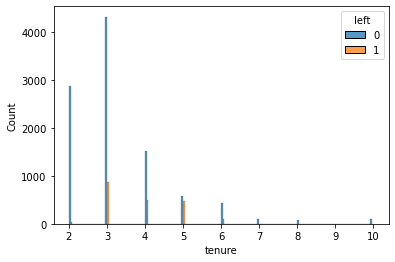

In [29]:
sns.histplot(data = df1,  x ='tenure', hue = 'left', multiple='dodge')



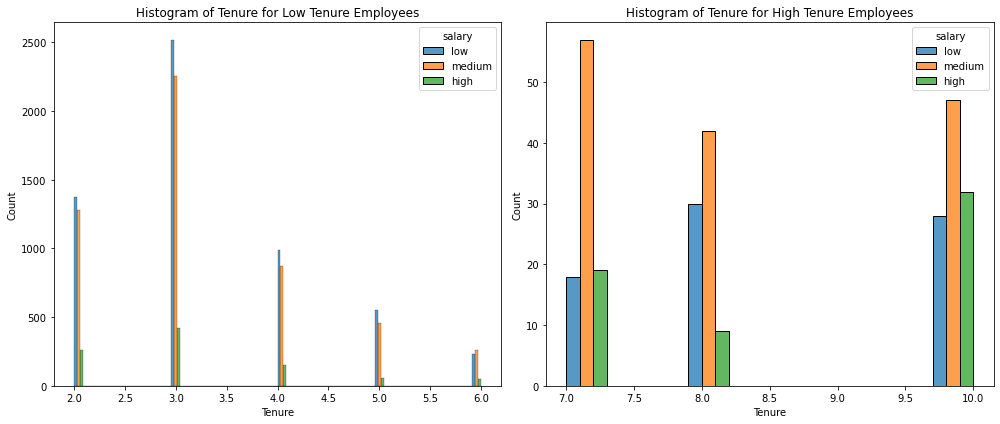

In [30]:
low_tenure = df1[df1['tenure'] <= 6]
high_tenure = df1[df1['tenure'] > 6]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for low_tenure
sns.histplot(data=low_tenure, x='tenure', hue='salary', multiple='dodge', ax=axes[0])
axes[0].set_title('Histogram of Tenure for Low Tenure Employees')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')

# Plot histogram for high_tenure
sns.histplot(data=high_tenure, x='tenure', hue='salary', hue_order=['low','medium','high'], multiple='dodge', ax=axes[1])
axes[1].set_title('Histogram of Tenure for High Tenure Employees')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

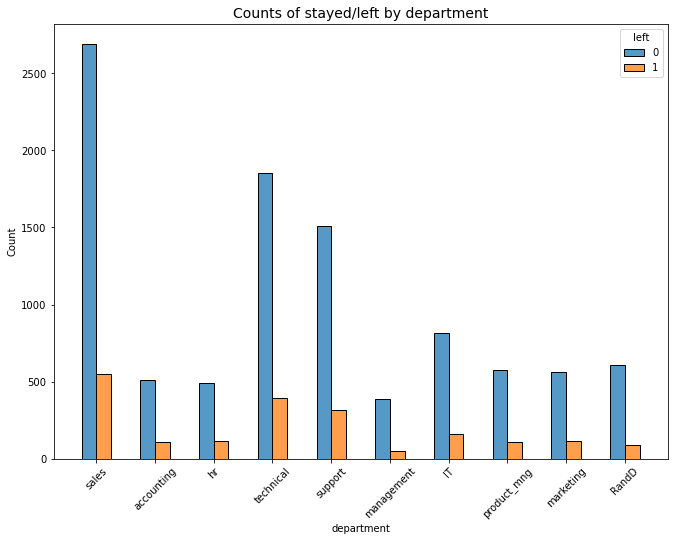

In [31]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

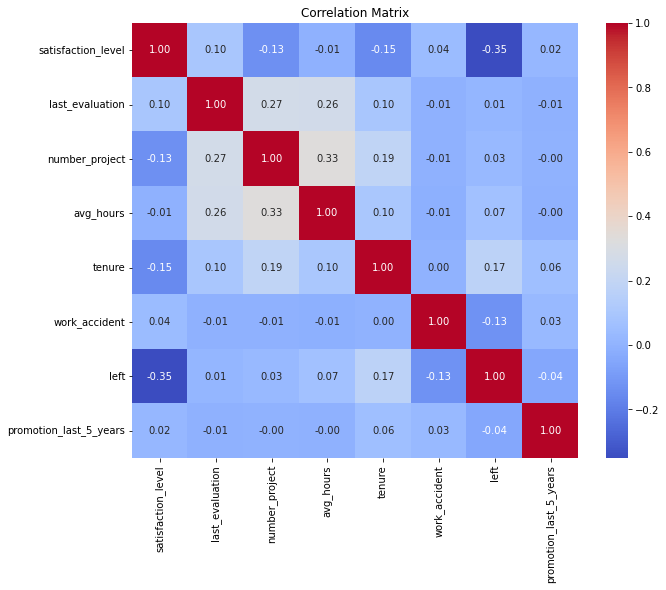

In [32]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### Insights

There seems to be a lot of employee mismanagement. People are working a lot and usually work more than 50 hours a week and hardly get promoted. There is a lot of dissatisfaction amongst people who work more than 270 hours and they necessarily leave also if you work more than 6 years you tend to stay in the company. 

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
### YOUR CODE HERE ###
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


In [34]:
df1.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
avg_hours                   int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
department                 object
salary                     object
dtype: object

In [35]:
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [36]:
sal_map = {'low':0, 'medium':1, 'high':2}

df1['salary'] = df1['salary'].map(sal_map)

df1.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [37]:
df1 = pd.get_dummies(df1, columns = ['department'], drop_first=True)

df1.head()

,satisfaction_level,last_evaluation,number_project,avg_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


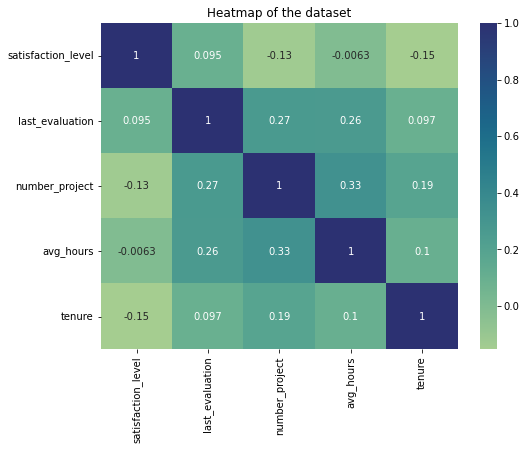

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['satisfaction_level', 'last_evaluation', 'number_project', 'avg_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

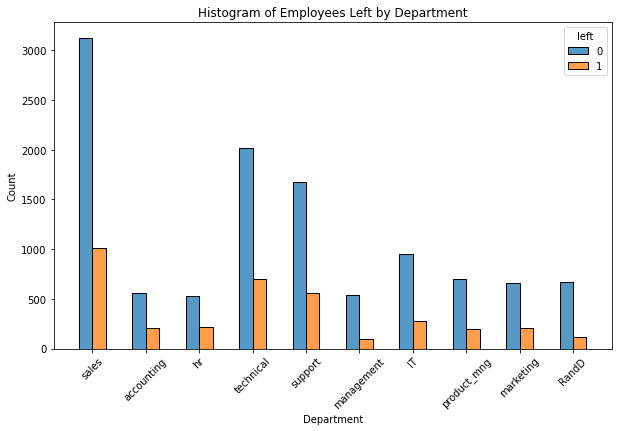

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Histogram of Employees Left by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [40]:
#since LR is sensitive to outliers we shall remove them

df2 = df1[(df1['tenure'] >= ll) & (df1['tenure'] <= ul)]

df2.shape

(11167, 18)

In [41]:
y = df2['left']
X = df2.drop('left', axis = 1).copy()

X.shape

(11167, 17)

In [42]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## Logistic Regression Model in Scikit

In [43]:
lr_clf = LogisticRegression(random_state=42, max_iter=500)

In [44]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = lr_clf.predict(X_test)

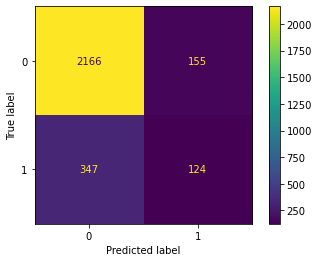

In [135]:
# Compute values for confusion matrix
lr_cm = confusion_matrix(y_test, y_pred, labels=lr_clf.classes_)

# Create display of confusion matrix
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, 
                                  display_labels=lr_clf.classes_)

# Plot confusion matrix
lr_disp.plot(values_format='')

# Display plot
plt.show()

In [136]:
# Metrics 
preds = y_pred
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f'TP = 124, TN = 2166, FN = 347, FP = 155')
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')




TP = 124, TN = 2166, FN = 347, FP = 155
accuracy = 0.8202005730659025
precision = 0.4444444444444444
recall = 0.2632696390658174
f1 = 0.33066666666666666


In [115]:
lr_clf.feature_importance

AttributeError: 'LogisticRegression' object has no attribute 'feature_importance'

In [137]:
results_lr = [accuracy, precision, recall, f1, None, None, None ]

results_lr

[0.8202005730659025,
 0.4444444444444444,
 0.2632696390658174,
 0.33066666666666666,
 None,
 None,
 None]

In [48]:
(124 + 2166)/ (124 + 2166+155+347)

0.8202005730659025

In [49]:
124 / (124 + 155)

0.4444444444444444

In [50]:
124 / (124 + 347)

0.2632696390658174

# Huge number of False negatives

which means it predicts a lot more people staying back in the company when actually the people left which means we need to spend a lot more effort and resources trying to hire new people as the model did NOT sufficiently predict the number of people who chose to leave. 

In [51]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



When it comes to recall we have around 0.26 (1/FN) and precision around 0.44 (1/FP) which indicates we have a lot more FN indicating the model does not do well in predicting how many would leave the company

# Tree based method
## See if metrics are better than LR



In [52]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_DT = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='f1')

In [53]:
tree_DT.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [54]:
tree_DT.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [55]:
tree_DT.best_score_

0.9437155941908626

In [56]:
# Specify hyperparameters
max_depth = 6
min_samples_leaf = 1
min_samples_split = 4

# Initialize DecisionTreeClassifier with hyperparameters
tree_DT_best = DecisionTreeClassifier(max_depth=max_depth, 
                                       min_samples_leaf=min_samples_leaf, 
                                       min_samples_split=min_samples_split)

In [138]:
tree_DT_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [139]:
tree_DT_pred = tree_DT_best.predict(X_test)

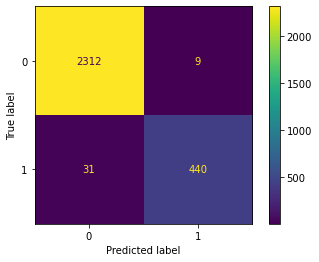

In [140]:
# Compute values for confusion matrix
y_pred = tree_DT_pred
tree_DT_cm = confusion_matrix(y_test, y_pred, labels=tree_DT_best.classes_)

# Create display of confusion matrix
tree_DT_disp = ConfusionMatrixDisplay(confusion_matrix=tree_DT_cm, 
                                  display_labels=tree_DT_best.classes_)

# Plot confusion matrix
tree_DT_disp.plot(values_format='')

# Display plot
plt.show()

In [141]:
preds = y_pred
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f'TP = 440, TN = 2312, FN = 31, FP = 9')
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')




TP = 440, TN = 2312, FN = 31, FP = 9
accuracy = 0.9856733524355301
precision = 0.9799554565701559
recall = 0.9341825902335457
f1 = 0.9565217391304348


In [142]:
results_DT = [accuracy, precision, recall, f1, 'satisfaction_level', 'tenure','last_evaluation' ]
results_DT

[0.9856733524355301,
 0.9799554565701559,
 0.9341825902335457,
 0.9565217391304348,
 'satisfaction_level',
 'tenure',
 'last_evaluation']

Decision Tree based method does an extremely good job of predicting the number who will leave and is much better than the simple LR 

In [64]:
# Get feature importances
feature_importances = tree_DT_best.feature_importances_

# Sort indices of features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance ranking
print("Feature importance ranking:")
for i, index in enumerate(sorted_indices):
    print(f"{i + 1}. Feature {index}: {feature_importances[index]}")

Feature importance ranking:
1. Feature 0: 0.5395534586890466
2. Feature 4: 0.16145297724869087
3. Feature 1: 0.13367407646471618
4. Feature 2: 0.11525434801200123
5. Feature 3: 0.04942418217949027
6. Feature 13: 0.00056728414099108
7. Feature 16: 7.367326506377584e-05
8. Feature 9: 0.0
9. Feature 15: 0.0
10. Feature 7: 0.0
11. Feature 6: 0.0
12. Feature 5: 0.0
13. Feature 10: 0.0
14. Feature 11: 0.0
15. Feature 12: 0.0
16. Feature 14: 0.0
17. Feature 8: 0.0


In [66]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'avg_hours',
       'tenure', 'work_accident', 'promotion_last_5_years', 'salary',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

In [62]:
tree1_importances = pd.DataFrame(tree_DT_best.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.539553
tenure,0.161453
last_evaluation,0.133674
number_project,0.115254
avg_hours,0.049424
department_product_mng,0.000567
department_technical,0.000074


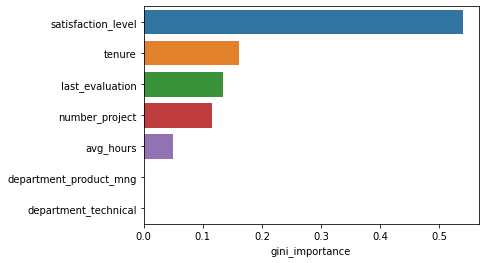

In [63]:
sns.barplot(data = tree1_importances, x = 'gini_importance', y= tree1_importances.index)

## In simple DT satisfaction level is the most important feature and surprisingly number_projects and avg_hours rank pretty low

# Random Forests

In [69]:
# random forests as the next model in tree based methods

rf_clf = RandomForestClassifier(random_state=0)

In [70]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='f1')

In [71]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [73]:
rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [77]:
rf1.best_score_

0.9513330242515372

In [143]:
rf_pred = rf1.best_estimator_.predict(X_test)

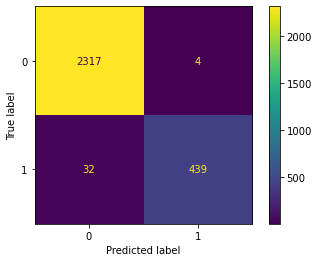

In [144]:
# Compute values for confusion matrix
y_pred = rf_pred
rf_cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf1.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()

In [145]:
preds = y_pred
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f'TP = 439, TN = 2317, FN = 32, FP = 4')
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')


TP = 439, TN = 2317, FN = 32, FP = 4
accuracy = 0.9871060171919771
precision = 0.9909706546275395
recall = 0.9320594479830149
f1 = 0.9606126914660832


In [146]:
rf_importances = pd.DataFrame(data=rf1.best_estimator_.feature_importances_, index=X.columns, columns=['gini criterion'])

rf_importances = rf_importances.sort_values(by = 'gini criterion', ascending= False)

rf_importances

,gini criterion
satisfaction_level,0.496158
tenure,0.151602
number_project,0.134070
last_evaluation,0.128158
avg_hours,0.072345
salary,0.003619
department_sales,0.002782
department_technical,0.002183
department_support,0.001874
department_RandD,0.001261


In [147]:
results_rf = [accuracy, precision, recall, f1, 'satisfaction_level', 'tenure','number_projects' ]
results_rf

[0.9871060171919771,
 0.9909706546275395,
 0.9320594479830149,
 0.9606126914660832,
 'satisfaction_level',
 'tenure',
 'number_projects']

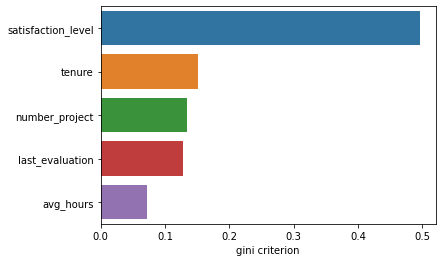

In [95]:
sns.barplot(data = rf_importances[:5], x = 'gini criterion', y = rf_importances.index[:5])

## In comparison to DT last_evaluation switches positions with number_projects but the top 2 remain the same with satisfaction level being the biggest indicator 

# XGBoost

In [96]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1,0.01,0.5,1],
             'max_depth': [2,8, None],
             'min_child_weight': [2,4,10],
             'n_estimators': [50,100,500]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [97]:
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [98]:
xgb1.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 100}

In [148]:
xgb_pred = xgb1.best_estimator_.predict(X_test)

In [149]:
preds = xgb_pred
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f'TP = 439, TN = 2317, FN = 32, FP = 4')
print(f'accuracy = {accuracy}')
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')

TP = 439, TN = 2317, FN = 32, FP = 4
accuracy = 0.9842406876790831
precision = 0.9841269841269841
recall = 0.921443736730361
f1 = 0.9517543859649124


In [107]:
importances = xgb1.best_estimator_.feature_importances_
xgb1_importances = pd.DataFrame(importances, index=X_test.columns, columns = ['gini'])



,gini
satisfaction_level,0.333077
last_evaluation,0.069162
number_project,0.087887
avg_hours,0.017411
tenure,0.485044
work_accident,0.000000
promotion_last_5_years,0.000000
salary,0.001908
department_RandD,0.000000
department_accounting,0.000000


In [111]:
xgb1_importances = xgb1_importances.sort_values(by='gini', ascending=False)
xgb1_importances.head()

,gini
tenure,0.485044
satisfaction_level,0.333077
number_project,0.087887
last_evaluation,0.069162
avg_hours,0.017411


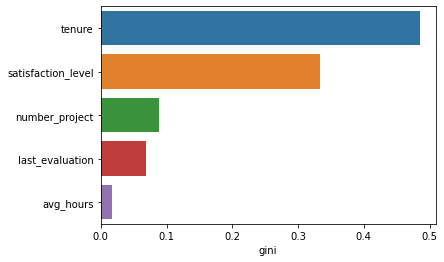

In [131]:
sns.barplot(data = xgb1_importances.head(), x = 'gini', y = xgb1_importances.head().index)

In [150]:
results_xgb = [accuracy, precision, recall, f1, 'tenure', 'statisfaction_level','number_projects']

results_xgb


[0.9842406876790831,
 0.9841269841269841,
 0.921443736730361,
 0.9517543859649124,
 'tenure',
 'statisfaction_level',
 'number_projects']

## XGBoost values tenure a lot more important than satisfaction level but in all models the common estimators are tenure and satisfaction level

In [113]:
# build a comparison table of the 3 most important features and scores 

In [151]:
results_lr

[0.8202005730659025,
 0.4444444444444444,
 0.2632696390658174,
 0.33066666666666666,
 None,
 None,
 None]

In [164]:
results_df = pd.DataFrame(columns = ['Method', 'Accuracy', 'Precision','Recall', 'f1', 'feature_1','feature_2','feature_3'])

results_df

,Method,Accuracy,Precision,Recall,f1,feature_1,feature_2,feature_3


In [166]:
results_df.columns

Index(['Method', 'Accuracy', 'Precision', 'Recall', 'f1', 'feature_1',
       'feature_2', 'feature_3'],
      dtype='object')

In [163]:
results_lr.insert(0,'Logistic Reg')
results_lr

['Logistic Reg',
 'Logistic Reg',
 0.8202005730659025,
 0.4444444444444444,
 0.2632696390658174,
 0.33066666666666666,
 None,
 None,
 None]

In [168]:
results_lr = results_lr[1:]

In [169]:
results_lr

['Logistic Reg',
 0.8202005730659025,
 0.4444444444444444,
 0.2632696390658174,
 0.33066666666666666,
 None,
 None,
 None]

In [155]:
results_DT.insert(0,'Decision Tree')
results_rf.insert(0,'Random Forests')
results_xgb.insert(0,'XG Boost')

In [170]:
results_df = results_df.append(pd.Series(results_lr, index = results_df.columns), ignore_index = True)
results_df

,Method,Accuracy,Precision,Recall,f1,feature_1,feature_2,feature_3
0,Logistic Reg,0.820201,0.444444,0.26327,0.330667,None,None,None


In [171]:
results_df = results_df.append(pd.Series(results_DT, index = results_df.columns), ignore_index = True)


In [172]:
results_df = results_df.append(pd.Series(results_rf, index = results_df.columns), ignore_index = True)


In [173]:
results_df = results_df.append(pd.Series(results_xgb, index = results_df.columns), ignore_index = True)


In [174]:
results_df

,Method,Accuracy,Precision,Recall,f1,feature_1,feature_2,feature_3
0,Logistic Reg,0.820201,0.444444,0.263270,0.330667,None,None,None
1,Decision Tree,0.985673,0.979955,0.934183,0.956522,satisfaction_level,tenure,last_evaluation
2,Random Forests,0.987106,0.990971,0.932059,0.960613,satisfaction_level,tenure,number_projects
3,XG Boost,0.984241,0.984127,0.921444,0.951754,tenure,statisfaction_level,number_projects


# Random forests seems to be the best method with the highest recall and f1 score
## Satistfaction level and tenure seem to be the greatest indicators of whether or not a person leaves the company

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.